In [84]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
data=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [86]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


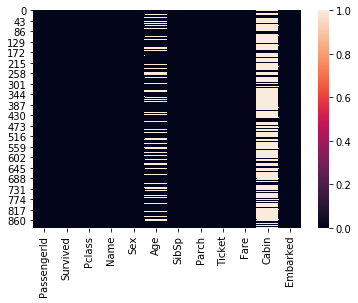

In [87]:
sns.heatmap(data.isnull())  #if any null data?
                            # age, and cabin are missing

# Surived vs died (cat by Sex, Age, Fare, Pclass, Bording locaiton)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


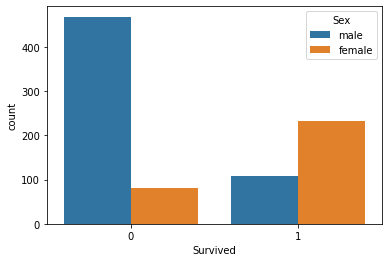

In [88]:
sns.countplot(x='Survived',hue='Sex',data=data)
data.groupby('Sex').count()

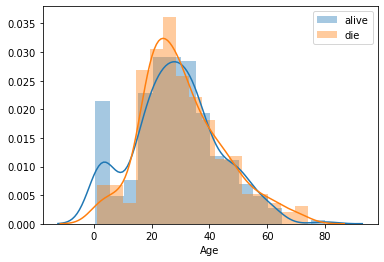

In [89]:
sns.distplot(data[data.Survived==1]['Age'],label='alive')
sns.distplot(data[data.Survived==0]['Age'],label='die')
plt.legend()


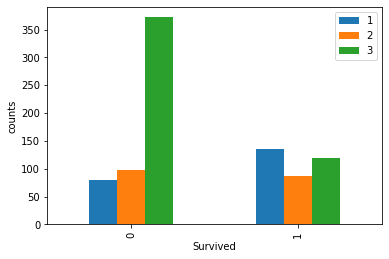

In [90]:

data['Pclass'].value_counts()
S_p1=data.Survived[data.Pclass==1].value_counts()
S_p2=data.Survived[data.Pclass==2].value_counts()
S_p3=data.Survived[data.Pclass==3].value_counts()
df=pd.DataFrame({1:S_p1, 2:S_p2, 3:S_p3})

df.plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('counts')
plt.show()

In [91]:
S_S=data[data.Embarked=='S'].Survived.value_counts()
S_Q=data[data.Embarked == 'Q'].Survived.value_counts()
S_C=data[data.Embarked == 'C'].Survived.value_counts()
data_embarked=pd.DataFrame({'S':S_S,'Q':S_Q, 'C':S_C })

Text(0, 0.5, 'counts')

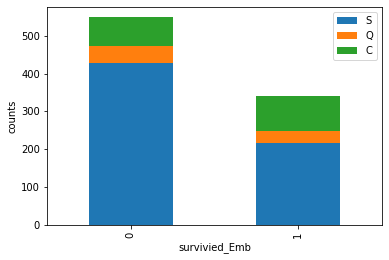

In [92]:
data_embarked.plot(kind='bar', stacked=True)


plt.xlabel('survivied_Emb')
plt.ylabel('counts')

Transfer data and check if there is any null


In [93]:
def dataX_transfer(dataX):
    data_X_KNN=dataX[['Pclass','Sex','Age','Fare','Embarked']]
    data_X_KNN['Age']=data_X_KNN['Age'].fillna(data_X_KNN['Age'].median())
    data_X_KNN['Embarked']=data_X_KNN['Embarked'].fillna('S')
    data_X_KNN.loc[data_X_KNN.Sex=='male','Sex']=1
    data_X_KNN.loc[data_X_KNN.Sex=='female','Sex']=0


    data_X_KNN.loc[data_X_KNN.Embarked=='S','Embarked']=0
    data_X_KNN.loc[data_X_KNN.Embarked=='Q','Embarked']=1
    data_X_KNN.loc[data_X_KNN.Embarked=='C','Embarked']=2
    
    return data_X_KNN



In [94]:
data_X_KNN=dataX_transfer(data)

data_X_KNN.isnull().sum() # no NAN data

D:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Softwares\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [95]:
data_X_KNN.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,2
2,3,0,26.0,7.9250,0
3,1,0,35.0,53.1000,0
4,3,1,35.0,8.0500,0


In [96]:
data_y_KNN=data['Survived']

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
...     data_X_KNN, data_y_KNN, test_size=0.2, random_state=42)

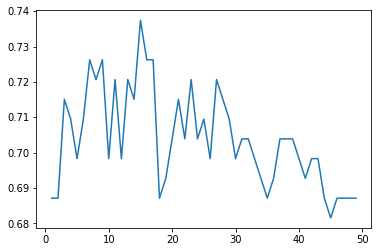

In [99]:
 accuracy_data=[]
for k in range (1,50):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    confusion_matrix(y_test,y_pred)
    classification_report(y_test,y_pred)
    
    accuracy_data.append(accuracy_score(y_test,y_pred))
plt.plot(range(1,50),accuracy_data)


In [100]:
k=[i for i,j in enumerate(accuracy_data) if j==max(accuracy_data)]
k

[14]

In [101]:
knn=KNeighborsClassifier(n_neighbors=k[0])
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[97,  8],
       [43, 31]], dtype=int64)

In [102]:
classification_report(y_test,y_pred)


'              precision    recall  f1-score   support\n\n           0       0.69      0.92      0.79       105\n           1       0.79      0.42      0.55        74\n\n    accuracy                           0.72       179\n   macro avg       0.74      0.67      0.67       179\nweighted avg       0.74      0.72      0.69       179\n'

In [103]:
data_test_prediction=pd.read_csv('test.csv')
data_test_prediction.isnull().sum()
data_test_prediction.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [104]:
data_X_test_prediction=dataX_transfer(data_test_prediction)

data_X_test_prediction.isnull().sum()

D:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Softwares\Anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

Pclass      0
Sex         0
Age         0
Fare        1
Embarked    0
dtype: int64

In [105]:
data_X_test_prediction['Fare']=data_X_test_prediction['Fare'].fillna(data_X_test_prediction['Fare'].median())

D:\Softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
y_test_pred=knn.predict(data_X_test_prediction)
print(y_test_pred)

[0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 0]


In [107]:

y_test_pred=y_test_pred[:,np.newaxis]

print(data_test_prediction.shape,y_test_pred.shape)
y_test_result=np.concatenate((y_test_pred,data_test_prediction), axis=1)

(418, 11) (418, 1)


In [108]:
Final_output=pd.DataFrame(y_test_result)

In [109]:
Final_output.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,0,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,NaN,S
2,0,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q


In [110]:
Final_output.to_csv('Final_result.csv')


how to submit in Kaggle?